In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ba457b34dacf6b1c09ef8dade0e8f305


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [6]:
#Example from CityPy Github


#>>> from citipy import citipy
#>>> city = citipy.nearest_city(22.99, 120.21)
#>>> city
#<citipy.City instance at 0x1069b6518>
#>>>
#>>> city.city_name     # Tainan, my home town
#'tainan'
#>>>
#>>> city.country_code
#'tw'                  # And the country is surely Taiwan

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


624

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#         time.sleep(60)

#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hasaki
Processing Record 2 of Set 1 | sisimiut
Processing Record 3 of Set 1 | lompoc
Processing Record 4 of Set 1 | huehuetoca
Processing Record 5 of Set 1 | mattru
Processing Record 6 of Set 1 | bargal
City not found. Skipping...
Processing Record 7 of Set 1 | busselton
Processing Record 8 of Set 1 | punta arenas
Processing Record 9 of Set 1 | rikitea
Processing Record 10 of Set 1 | baykit
Processing Record 11 of Set 1 | luderitz
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | puerto ayora
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | srivardhan
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 18 of Set 1 | dalbandin
Processing Record 19 of Set 1 | uniontown
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | bethel
Processing Record 22 of Set 1 | jamestown
Processing Record 23 of Set 1 | joshimath
Proce

Processing Record 39 of Set 4 | chernyshevskiy
Processing Record 40 of Set 4 | portland
Processing Record 41 of Set 4 | bafoulabe
Processing Record 42 of Set 4 | qasigiannguit
Processing Record 43 of Set 4 | marks
Processing Record 44 of Set 4 | guajara-mirim
City not found. Skipping...
Processing Record 45 of Set 4 | cabo san lucas
Processing Record 46 of Set 4 | birin
Processing Record 47 of Set 4 | hofn
Processing Record 48 of Set 4 | salou
Processing Record 49 of Set 4 | jalu
Processing Record 50 of Set 4 | farafangana
Processing Record 1 of Set 5 | huilong
Processing Record 2 of Set 5 | berlevag
Processing Record 3 of Set 5 | khatanga
Processing Record 4 of Set 5 | manaus
Processing Record 5 of Set 5 | saleaula
City not found. Skipping...
Processing Record 6 of Set 5 | sept-iles
Processing Record 7 of Set 5 | arraial do cabo
Processing Record 8 of Set 5 | bilibino
Processing Record 9 of Set 5 | honiara
Processing Record 10 of Set 5 | bengkulu
Processing Record 11 of Set 5 | seoul


Processing Record 29 of Set 8 | auki
Processing Record 30 of Set 8 | bograd
Processing Record 31 of Set 8 | shingu
Processing Record 32 of Set 8 | puerto escondido
Processing Record 33 of Set 8 | verkhoyansk
Processing Record 34 of Set 8 | katsuura
Processing Record 35 of Set 8 | khandyga
Processing Record 36 of Set 8 | aloleng
Processing Record 37 of Set 8 | pimentel
Processing Record 38 of Set 8 | sao joao da barra
Processing Record 39 of Set 8 | brae
Processing Record 40 of Set 8 | cherskiy
Processing Record 41 of Set 8 | iqaluit
Processing Record 42 of Set 8 | baruun-urt
Processing Record 43 of Set 8 | havre-saint-pierre
Processing Record 44 of Set 8 | sibolga
Processing Record 45 of Set 8 | ilulissat
Processing Record 46 of Set 8 | meulaboh
Processing Record 47 of Set 8 | brooks
Processing Record 48 of Set 8 | imaculada
Processing Record 49 of Set 8 | narsaq
Processing Record 50 of Set 8 | prince rupert
Processing Record 1 of Set 9 | comodoro rivadavia
Processing Record 2 of Set 9

Processing Record 16 of Set 12 | mrirt
City not found. Skipping...
Processing Record 17 of Set 12 | port blair
Processing Record 18 of Set 12 | luganville
Processing Record 19 of Set 12 | rzeszow
Processing Record 20 of Set 12 | yantal
Processing Record 21 of Set 12 | veliki crljeni
Processing Record 22 of Set 12 | ishlei
City not found. Skipping...
Processing Record 23 of Set 12 | lucea
Processing Record 24 of Set 12 | jacareacanga
Processing Record 25 of Set 12 | charlestown
Processing Record 26 of Set 12 | kholodnyy
Processing Record 27 of Set 12 | dossor
Processing Record 28 of Set 12 | devonport
Processing Record 29 of Set 12 | gamba
Processing Record 30 of Set 12 | tabory
Processing Record 31 of Set 12 | praia
Processing Record 32 of Set 12 | barcelos
Processing Record 33 of Set 12 | zhanakorgan
Processing Record 34 of Set 12 | tabasco
Processing Record 35 of Set 12 | guanica
Processing Record 36 of Set 12 | el reno
Processing Record 37 of Set 12 | iguape
Processing Record 38 of 

In [12]:
len(city_data)


575

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hasaki,35.7333,140.8333,43.20,75,100,20.13,JP,2022-03-17 22:24:16
1,Sisimiut,66.9395,-53.6735,-1.57,73,100,12.46,GL,2022-03-17 22:24:17
2,Lompoc,34.6391,-120.4579,73.69,76,20,19.57,US,2022-03-17 22:23:34
3,Huehuetoca,19.8489,-99.2042,71.22,14,60,11.50,MX,2022-03-17 22:24:18
4,Mattru,7.6244,-11.8332,79.03,68,92,4.70,SL,2022-03-17 22:24:18
5,Busselton,-33.6500,115.3333,63.16,90,95,6.98,AU,2022-03-17 22:24:19
6,Punta Arenas,-53.1500,-70.9167,44.71,49,20,18.41,CL,2022-03-17 22:22:22
7,Rikitea,-23.1203,-134.9692,80.47,79,10,14.56,PF,2022-03-17 22:22:56
8,Baykit,61.6700,96.3700,-5.44,100,95,1.90,RU,2022-03-17 22:24:20
9,Luderitz,-26.6481,15.1594,68.25,64,15,2.86,NA,2022-03-17 22:24:20


In [14]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [15]:
city_data_df = city_data_df[new_column_order]

In [16]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2022-03-17 22:24:16,35.7333,140.8333,43.20,75,100,20.13
1,Sisimiut,GL,2022-03-17 22:24:17,66.9395,-53.6735,-1.57,73,100,12.46
2,Lompoc,US,2022-03-17 22:23:34,34.6391,-120.4579,73.69,76,20,19.57
3,Huehuetoca,MX,2022-03-17 22:24:18,19.8489,-99.2042,71.22,14,60,11.50
4,Mattru,SL,2022-03-17 22:24:18,7.6244,-11.8332,79.03,68,92,4.70
...,...,...,...,...,...,...,...,...,...
570,Beppu,JP,2022-03-17 22:40:28,33.2736,131.4919,51.49,99,100,5.06
571,Ondo,NG,2022-03-17 22:40:28,7.1000,4.8333,76.39,93,100,2.01
572,Banda Aceh,ID,2022-03-17 22:40:29,5.5577,95.3222,78.57,82,100,8.21
573,Labytnangi,RU,2022-03-17 22:40:29,66.6572,66.4183,18.86,86,100,9.28


In [17]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [18]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

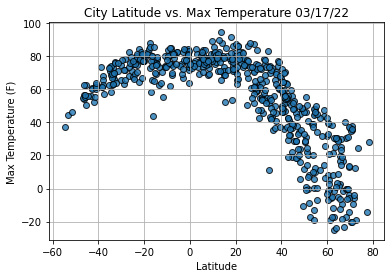

In [19]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

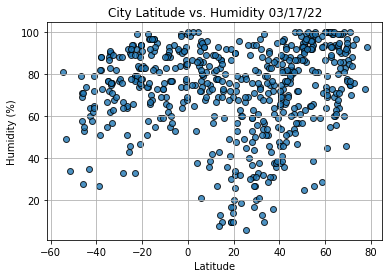

In [20]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

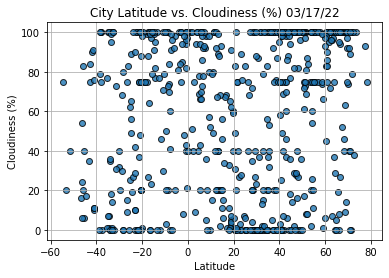

In [21]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

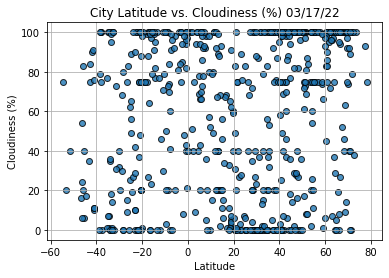

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

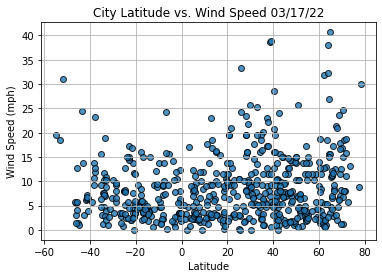

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]

In [26]:
index13

City                   Srivardhan
Country                        IN
Date          2022-03-17 22:24:22
Lat                       18.0333
Lng                       73.0167
Max Temp                    77.09
Humidity                       76
Cloudiness                     33
Wind Speed                   1.36
Name: 13, dtype: object

In [27]:
city_data_df["Lat"] >= 0

0      True
1      True
2      True
3      True
4      True
       ... 
570    True
571    True
572    True
573    True
574    True
Name: Lat, Length: 575, dtype: bool

In [28]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hasaki,JP,2022-03-17 22:24:16,35.7333,140.8333,43.20,75,100,20.13
1,Sisimiut,GL,2022-03-17 22:24:17,66.9395,-53.6735,-1.57,73,100,12.46
2,Lompoc,US,2022-03-17 22:23:34,34.6391,-120.4579,73.69,76,20,19.57
3,Huehuetoca,MX,2022-03-17 22:24:18,19.8489,-99.2042,71.22,14,60,11.50
4,Mattru,SL,2022-03-17 22:24:18,7.6244,-11.8332,79.03,68,92,4.70


In [29]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

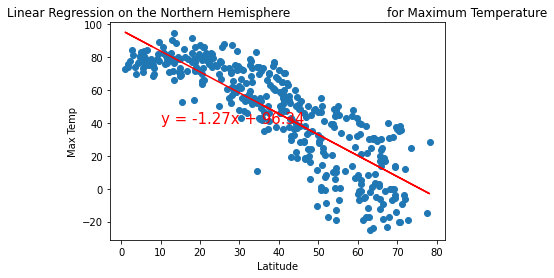

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

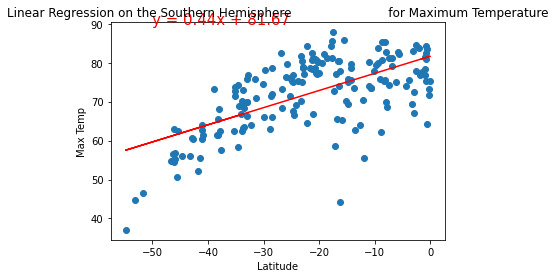

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for Maximum Temperature', 'Max Temp',(-50,90))

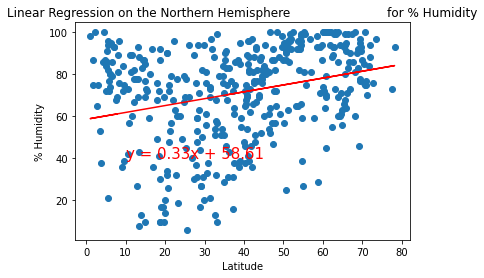

In [32]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

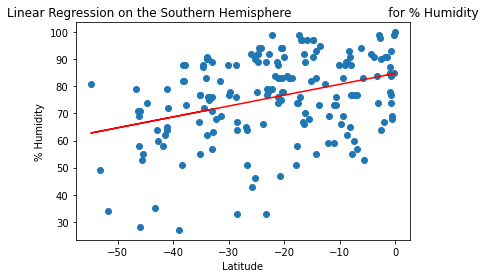

In [33]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n
                        for % Humidity', '% Humidity',(-50,15))

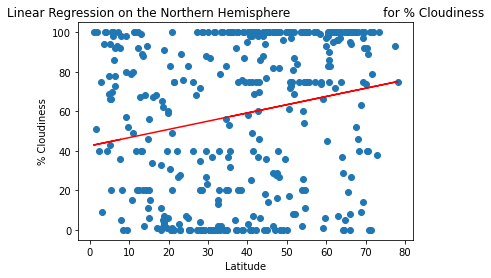

In [34]:
# Linear regression on the Northern Hemisphere Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(40,10))

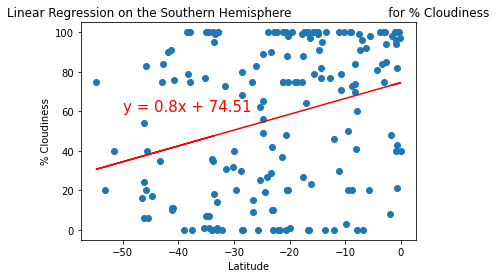

In [38]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

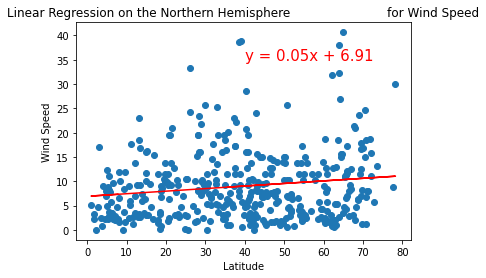

In [40]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

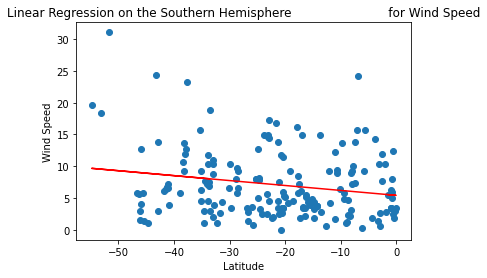

In [41]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))